# Libraries

In [1]:
#pip install --upgrade pydantic typing

In [2]:
#pip install --upgrade spacy

In [3]:
#pip uninstall -y spacy thinc

In [4]:
#pip install spacy==3.0.6  # ou a versão desejada

In [5]:
#!pip install --upgrade pip

In [6]:
#!pip install numpy scipy scikit-learn

In [7]:
#!xcode-select --install

In [8]:
#!pip install umap-learn hdbscan

In [9]:
#!pip install bertopic

In [10]:
import inflection 
import pandas as pd
import numpy as np
import urllib.request
import nltk
from nltk import FreqDist
from nltk.util import bigrams, trigrams, ngrams
from bs4 import BeautifulSoup as bs
from matplotlib import pyplot as plt
from itertools import chain
from wordcloud import WordCloud
from bertopic import BERTopic

2024-02-06 09:05:57.151026: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
import spacy


# Data Collection

In [12]:
page = urllib.request.urlopen("https://en.wikipedia.org/wiki/Data_science")

In [13]:
page

In [14]:
print(page)

## HTML Content

In [15]:
print(page.read())

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Data science - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-

## Text Content

Since we do not want the HTML context but the text content, thus we must clean the content from the variable page.

In [16]:
#!pip install html5lib

In [17]:
clean_content = bs(page, "html5lib").get_text()

In [18]:
clean_content

''

In [19]:
print(clean_content)

# lxml Method

In [20]:
from lxml import html

In [21]:
page_str = str(page)

In [22]:
# Parse o conteúdo HTML com a biblioteca lxml
tree = html.fromstring(page_str)

# Extraia o texto da página
clean_content = tree.text_content()

In [23]:
clean_content

''

# Selenium Method

In [24]:
#pip install selenium

In [25]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService

In [26]:
pwd

'/Users/lucasquemelli/Documents/repos'

In [27]:
# # Configurando o caminho do driver do Chrome (substitua pelo seu caminho)
# chrome_driver_path = "/Users/lucasquemelli/Documents/repos/NLP_introduction/chromedriver"

# # Inicializando o navegador Chrome
# chrome_options = webdriver.ChromeOptions()
# chrome_options.add_argument("--headless")  # Executar em modo headless (sem interface gráfica)
# chrome_service = ChromeService(chrome_driver_path)
# driver = webdriver.Chrome(service=chrome_service, options=chrome_options)

# # URL da página que você deseja raspar
# url = "https://en.wikipedia.org/wiki/Data_science"

# # Abrindo a página no navegador
# driver.get(url)

# # Aguarde o carregamento completo da página (você pode ajustar isso conforme necessário)
# driver.implicitly_wait(10)

# # Obtendo o conteúdo da página
# page_content = driver.page_source

# # Fechando o navegador
# driver.quit()

# # Exibindo o conteúdo obtido
# print(page_content)


# Loading Data

Base de dados: top 500 livros da Amazon em 2024.

In [28]:
pwd

'/Users/lucasquemelli/Documents/repos'

In [29]:
data = pd.read_csv("/Users/lucasquemelli/Documents/repos/NLP_introduction/amazon_top500.csv")

In [30]:
data.head()

,title,brand,description,price/currency,price/value,stars,reviewsCount
0,"65W Universal USB C Chromebook Charger,Replace...",NELEBUTO,NaN,$,13.69,4.2,55.0
1,"EMPSIGN Laptop Tote bag for women 16 Inch, Sty...",EMPSIGN,NaN,$,31.99,4.9,58.0
2,"100Pcs Mario Stickers, Cartoon Game Mario Stic...",MOQIAN,100Pcs Japanese Cartoon Game Mari Stickers for...,$,5.99,4.6,42.0
3,"USB Docking Station, JESWO USB 3.0 Laptop Dock...",JESWO,NaN,$,79.99,4.2,39.0
4,ANCBD C31N1824 Battery for Asus Chromebook Fli...,ANCBD,Specification: Battery Rating: 11.55V Battery ...,$,46.99,NaN,NaN


In [31]:
data.shape

(500, 7)

# Features

**Title:** Captures the essence of each product.

**Brand:** Identifies the producer, essential for brand impact analysis.

**Description:** Offers detailed narratives, ripe for textual analysis.

**Price:** Provides economic data points for market and sales analyses.

**Stars:** Reflects customer satisfaction and product quality perceptions.

**ReviewsCount:** Measures engagement and popularity among consumers.

In [32]:
data.columns

Index(['title', 'brand', 'description', 'price/currency', 'price/value',
       'stars', 'reviewsCount'],
      dtype='object')

In [33]:
cols_old = data.columns

snake_case = lambda x: inflection.underscore(x)

cols_new = list(map(snake_case, cols_old))

#rename
data.columns = cols_new
data.rename(columns=lambda x: x.replace('/', '_'), inplace=True)

In [34]:
data.columns

Index(['title', 'brand', 'description', 'price_currency', 'price_value',
       'stars', 'reviews_count'],
      dtype='object')

In [35]:
data.dtypes

title              object
brand              object
description        object
price_currency     object
price_value       float64
stars             float64
reviews_count     float64
dtype: object

# Tokenization

Processo de transformação de uma frase em um conjunto de palavras. Exemplo:

- "Este é um treinamento para introdução a processamento de linguagem natural".

- ["Este", "é", "um", "treinamento", "para", "introdução", "a", "processamento",
    "de", "linguagem", "natural"]

Esse processo é importante porque eu posso querer medir a quantidade de um determinado token. 

A biblioteca spacy pode ser uma vantagem porque tem o idioma português. A gente vai baixar o core pequeno para a língua portuguesa. Depois faremos o mesmo para a língua inglesa.

- pt: portugues
- sm: small (poderia ser md ou lg: medium ou large)

In [36]:
#!python -m spacy download pt_core_news_sm

In [37]:
#!python -m spacy download en_core_web_sm

In [38]:
pln = spacy.load("pt_core_news_sm")

In [39]:
nlp = spacy.load("en_core_web_sm")

Vamos criar uma instância do nlp. Depois vamos criar tokens. 

In [40]:
tokens = []
tokens = data["description"].apply(lambda text: [token.text for token in nlp(text)] if isinstance(text, str) else [])


In [41]:
tokens

0                                                     []
1                                                     []
2      [100Pcs, Japanese, Cartoon, Game, Mari, Sticke...
3                                                     []
4      [Specification, :, Battery, Rating, :, 11.55V,...
                             ...                        
495    [About, the, product, :, Quantity, :, 50, pcs,...
496    [Specification, :,  , Screen, Size, :, 15.6, "...
497                                                   []
498                                                   []
499                                                   []
Name: description, Length: 500, dtype: object

In [42]:
tokens = []
tokens = data["description"].apply(lambda text: [token.lemma_ for token in nlp(text)] if isinstance(text, str) else [])


In [43]:
tokens

0                                                     []
1                                                     []
2      [100pcs, japanese, Cartoon, Game, Mari, Sticke...
3                                                     []
4      [specification, :, Battery, rating, :, 11.55V,...
                             ...                        
495    [about, the, product, :, quantity, :, 50, pc, ...
496    [specification, :,  , Screen, Size, :, 15.6, "...
497                                                   []
498                                                   []
499                                                   []
Name: description, Length: 500, dtype: object

In [44]:
data["tokens"] = data["description"].apply(lambda text: [token.text for token in nlp(text)] if isinstance(text, str) else [])

In [45]:
data.head()

,title,brand,description,price_currency,price_value,stars,reviews_count,tokens
0,"65W Universal USB C Chromebook Charger,Replace...",NELEBUTO,NaN,$,13.69,4.2,55.0,[]
1,"EMPSIGN Laptop Tote bag for women 16 Inch, Sty...",EMPSIGN,NaN,$,31.99,4.9,58.0,[]
2,"100Pcs Mario Stickers, Cartoon Game Mario Stic...",MOQIAN,100Pcs Japanese Cartoon Game Mari Stickers for...,$,5.99,4.6,42.0,"[100Pcs, Japanese, Cartoon, Game, Mari, Sticke..."
3,"USB Docking Station, JESWO USB 3.0 Laptop Dock...",JESWO,NaN,$,79.99,4.2,39.0,[]
4,ANCBD C31N1824 Battery for Asus Chromebook Fli...,ANCBD,Specification: Battery Rating: 11.55V Battery ...,$,46.99,NaN,NaN,"[Specification, :, Battery, Rating, :, 11.55V,..."


# stopWords

São "palavras de parada". Elas não trazem sentido para o texto como um todo. Logo, podemos eliminá-las. 

## Selecionando stopWords

In [46]:

data["tokens"] = data["description"].apply(lambda text: [token.text for token in nlp(text) if token.is_stop] 
                                           if isinstance(text, str) else [])



In [47]:
data.head()

,title,brand,description,price_currency,price_value,stars,reviews_count,tokens
0,"65W Universal USB C Chromebook Charger,Replace...",NELEBUTO,NaN,$,13.69,4.2,55.0,[]
1,"EMPSIGN Laptop Tote bag for women 16 Inch, Sty...",EMPSIGN,NaN,$,31.99,4.9,58.0,[]
2,"100Pcs Mario Stickers, Cartoon Game Mario Stic...",MOQIAN,100Pcs Japanese Cartoon Game Mari Stickers for...,$,5.99,4.6,42.0,[for]
3,"USB Docking Station, JESWO USB 3.0 Laptop Dock...",JESWO,NaN,$,79.99,4.2,39.0,[]
4,ANCBD C31N1824 Battery for Asus Chromebook Fli...,ANCBD,Specification: Battery Rating: 11.55V Battery ...,$,46.99,NaN,NaN,"[Part, For, For, Part, A, for]"


## Selecionando alpha numéricas

In [48]:

data["tokens"] = data["description"].apply(lambda text: [token.text for token in nlp(text) if token.is_alpha] 
                                           if isinstance(text, str) else [])



In [49]:
data.head()

,title,brand,description,price_currency,price_value,stars,reviews_count,tokens
0,"65W Universal USB C Chromebook Charger,Replace...",NELEBUTO,NaN,$,13.69,4.2,55.0,[]
1,"EMPSIGN Laptop Tote bag for women 16 Inch, Sty...",EMPSIGN,NaN,$,31.99,4.9,58.0,[]
2,"100Pcs Mario Stickers, Cartoon Game Mario Stic...",MOQIAN,100Pcs Japanese Cartoon Game Mari Stickers for...,$,5.99,4.6,42.0,"[Japanese, Cartoon, Game, Mari, Stickers, for,..."
3,"USB Docking Station, JESWO USB 3.0 Laptop Dock...",JESWO,NaN,$,79.99,4.2,39.0,[]
4,ANCBD C31N1824 Battery for Asus Chromebook Fli...,ANCBD,Specification: Battery Rating: 11.55V Battery ...,$,46.99,NaN,NaN,"[Specification, Battery, Rating, Battery, Batt..."


## Selecionando dígitos

In [50]:

data["tokens"] = data["description"].apply(lambda text: [token.text for token in nlp(text) if token.is_digit] 
                                           if isinstance(text, str) else [])



In [51]:
data.head()

,title,brand,description,price_currency,price_value,stars,reviews_count,tokens
0,"65W Universal USB C Chromebook Charger,Replace...",NELEBUTO,NaN,$,13.69,4.2,55.0,[]
1,"EMPSIGN Laptop Tote bag for women 16 Inch, Sty...",EMPSIGN,NaN,$,31.99,4.9,58.0,[]
2,"100Pcs Mario Stickers, Cartoon Game Mario Stic...",MOQIAN,100Pcs Japanese Cartoon Game Mari Stickers for...,$,5.99,4.6,42.0,[]
3,"USB Docking Station, JESWO USB 3.0 Laptop Dock...",JESWO,NaN,$,79.99,4.2,39.0,[]
4,ANCBD C31N1824 Battery for Asus Chromebook Fli...,ANCBD,Specification: Battery Rating: 11.55V Battery ...,$,46.99,NaN,NaN,"[12, 03290000, 242857100001, 242888700087, 441..."


## Selecionando grupos personalizados

Vamos selecionar as alfa numéricas e as que não são stopWords.

In [52]:

data["tokens"] = data["description"].apply(lambda text: [token.text for token in nlp(text) 
                                                         if token.is_alpha and not(token.is_stop)] 
                                                         if isinstance(text, str) else [])



In [53]:
data.head()

,title,brand,description,price_currency,price_value,stars,reviews_count,tokens
0,"65W Universal USB C Chromebook Charger,Replace...",NELEBUTO,NaN,$,13.69,4.2,55.0,[]
1,"EMPSIGN Laptop Tote bag for women 16 Inch, Sty...",EMPSIGN,NaN,$,31.99,4.9,58.0,[]
2,"100Pcs Mario Stickers, Cartoon Game Mario Stic...",MOQIAN,100Pcs Japanese Cartoon Game Mari Stickers for...,$,5.99,4.6,42.0,"[Japanese, Cartoon, Game, Mari, Stickers, Adul..."
3,"USB Docking Station, JESWO USB 3.0 Laptop Dock...",JESWO,NaN,$,79.99,4.2,39.0,[]
4,ANCBD C31N1824 Battery for Asus Chromebook Fli...,ANCBD,Specification: Battery Rating: 11.55V Battery ...,$,46.99,NaN,NaN,"[Specification, Battery, Rating, Battery, Batt..."


# Stemming e Lematização (lemma)

**Stemming** é o processo de reduzir a palavra para o seu tronco. Essa redução é feita de forma que as diversas variações fiquem do mesmo jeito: 

        - andei, andamos, andarão, andemos: and
        - dormir, dormindo, dormirei, dormiu: dorm 
        
Isso é importante muitas vezes porque a conjugação do verbo não é importante para a gente fazer o comparativo. Principalmente de a língua for inglesa. 

A lematização transforma a palavra para o modo infinitivo (lema):

        - andei: andar
        - lendo: ler
        - dormir: dormir

In [54]:

data["tokens"] = data["description"].apply(lambda text: [token.lemma_ for token in nlp(text) 
                                                         if token.is_alpha and not(token.is_stop)] 
                                                         if isinstance(text, str) else [])



In [55]:
data.head()

,title,brand,description,price_currency,price_value,stars,reviews_count,tokens
0,"65W Universal USB C Chromebook Charger,Replace...",NELEBUTO,NaN,$,13.69,4.2,55.0,[]
1,"EMPSIGN Laptop Tote bag for women 16 Inch, Sty...",EMPSIGN,NaN,$,31.99,4.9,58.0,[]
2,"100Pcs Mario Stickers, Cartoon Game Mario Stic...",MOQIAN,100Pcs Japanese Cartoon Game Mari Stickers for...,$,5.99,4.6,42.0,"[japanese, Cartoon, Game, Mari, Stickers, Adul..."
3,"USB Docking Station, JESWO USB 3.0 Laptop Dock...",JESWO,NaN,$,79.99,4.2,39.0,[]
4,ANCBD C31N1824 Battery for Asus Chromebook Fli...,ANCBD,Specification: Battery Rating: 11.55V Battery ...,$,46.99,NaN,NaN,"[specification, Battery, rating, Battery, Batt..."


O lemma_ só funciona para verbos. Então, não vamos selecionar nada que não seja verbo. Para isso, vamos colocar como restrição:

        - Tem que ser verbo: token.pos_ == "VERB"
        - Tem que ser alfabético: token.is_alpha
        - Não pode ser stopWords: not(token.is_stop)

In [56]:

data["tokens"] = data["description"].apply(lambda text: [token.lemma_ for token in nlp(text) 
                                                         if token.pos_ == "VERB" and token.is_alpha and not(token.is_stop)] 
                                                         if isinstance(text, str) else [])



In [57]:
data.loc[420]

title             Anhstks 62Pcs Black Text Sarcastic Stickers,Fu...
brand                                                       Anhstks
description       Feature: 1. Sunscreen and waterproof! Safe and...
price_currency                                                    $
price_value                                                    5.99
stars                                                           NaN
reviews_count                                                   NaN
tokens            [remove, leave, peel, stick, ues, tear, leave,...
Name: 420, dtype: object

Vamos exibir os tokens e suas classes gramaticais:

In [58]:
for lista_de_tokens in data["tokens"]:
    for token_text in lista_de_tokens:
        token = nlp(token_text)[0]  # Obtemos o primeiro token do texto
        if token.pos_:
            print(f"{token.text}:{token.pos_}")


reuse:VERB
remove:VERB
leave:VERB
show:VERB
diy:VERB
use:NOUN
clean:ADJ
stick:VERB
like:INTJ
want:VERB
come:VERB
meet:VERB
lose:VERB
take:VERB
include:VERB
feature:NOUN
use:NOUN
reuse:VERB
maintain:VERB
distil:NOUN
hope:NOUN
use:NOUN
provide:VERB
tear:NOUN
use:NOUN
clean:ADJ
use:NOUN
create:VERB
fade:NOUN
need:VERB
use:NOUN
create:VERB
remove:VERB
leave:VERB
peel:VERB
stick:VERB
ues:NOUN
tear:NOUN
leave:VERB
paste:VERB
tear:NOUN
paste:VERB
want:VERB
blow:VERB
press:NOUN
craft:NOUN
restore:VERB
maintain:VERB
peel:VERB
stick:VERB
fade:NOUN
leave:VERB
leave:VERB
transfer:NOUN
remove:VERB
damage:NOUN
deliver:VERB
deliver:VERB
repeat:VERB
select:ADJ
use:NOUN
clean:ADJ
stick:VERB
like:INTJ
start:VERB
thank:VERB
stop:VERB
see:VERB
like:INTJ
fade:NOUN
attract:VERB
enjoy:VERB
use:NOUN
design:NOUN
decorate:VERB
enjoy:VERB
clean:ADJ
want:VERB
use:NOUN
stick:VERB
stick:VERB
need:VERB
use:NOUN
contain:VERB
theme:NOUN
paste:VERB
need:VERB
tear:NOUN
use:NOUN
remove:VERB
leave:VERB
develop:VERB
secure

create:VERB
domesticate:VERB
feature:NOUN
exquisite:ADJ
remove:VERB
leave:VERB
remove:VERB
leave:VERB
peel:VERB
stick:VERB
peel:VERB
stick:VERB
fade:NOUN
fade:NOUN
contact:NOUN
try:VERB
answer:NOUN
bring:VERB
welcome:INTJ
provide:VERB
range:NOUN
temper:NOUN
cool:ADJ
provide:VERB
type:NOUN
protect:VERB
help:VERB
cool:ADJ
offer:VERB
prevent:VERB
overheat:VERB
reduce:VERB
elevate:VERB
reduce:VERB
create:VERB
invisible:ADJ
cool:ADJ
carry:VERB
work:VERB
quilt:NOUN
offer:VERB
protect:VERB
work:VERB
allow:VERB
need:VERB
ensure:VERB
pack:NOUN
carry:VERB
make:VERB
enhance:VERB
sell:VERB
bring:VERB
find:VERB
sticker:NOUN
allow:VERB
check:VERB
purchase:NOUN
show:VERB
design:NOUN
recommend:VERB
open:ADJ
confirm:VERB
need:VERB
use:NOUN
clean:ADJ
tear:NOUN
stick:VERB
leave:VERB
paste:VERB
tear:NOUN
paste:VERB
look:VERB
need:VERB
use:NOUN
create:VERB
remove:VERB
leave:VERB
peel:VERB
stick:VERB
recommend:VERB
want:VERB
decorate:VERB
guarantee:VERB
offer:VERB
provide:VERB
buy:VERB
form:NOUN
guarantee:V

remove:VERB
avoid:VERB
ensure:VERB
note:VERB
ship:NOUN
base:NOUN
contact:NOUN
check:VERB
match:NOUN
purchase:NOUN
come:VERB
contact:NOUN
fit:ADJ
help:VERB
find:VERB
guarantee:VERB
work:VERB
check:VERB
avoid:VERB
buy:VERB
include:VERB
certify:VERB
value:NOUN
offer:VERB
contact:NOUN
harness:NOUN
limit:VERB
connect:VERB
enable:VERB
enjoy:VERB
connect:VERB
charge:NOUN
connect:VERB
plug:VERB
power:NOUN
need:VERB
include:VERB
laptop:NOUN
confirm:VERB
buy:VERB
omen:NOUN
use:NOUN
eat:VERB
work:VERB
meet:VERB
recover:VERB
use:NOUN
place:NOUN
place:NOUN
meed:VERB
slide:NOUN
relax:VERB
view:NOUN
eat:VERB
clean:ADJ
stand:VERB
need:VERB
contact:NOUN
use:NOUN
clean:ADJ
use:NOUN
create:VERB
fade:NOUN
need:VERB
use:NOUN
create:VERB
use:NOUN
clean:ADJ
use:NOUN
create:VERB
fade:NOUN
need:VERB
use:NOUN
create:VERB
print:NOUN
mean:VERB
slide:NOUN
remain:VERB
mean:VERB
stay:VERB
remove:VERB
leave:VERB
leave:VERB
transfer:NOUN
remove:VERB
damage:NOUN
deliver:VERB
deliver:VERB
repeat:VERB
select:ADJ
provide:

# Frequência de palavras com NLTK

In [59]:
# Aplana a lista de listas
flat_tokens = list(chain.from_iterable(data["tokens"].values))

# Calcula a frequência
freq = FreqDist(flat_tokens)

In [60]:
print(freq.most_common())

[('use', 93), ('remove', 57), ('provide', 57), ('leave', 56), ('stick', 47), ('clean', 44), ('paste', 41), ('design', 41), ('protect', 40), ('ensure', 39), ('contact', 39), ('include', 36), ('need', 34), ('tear', 32), ('check', 30), ('create', 29), ('fade', 27), ('want', 25), ('feature', 25), ('allow', 24), ('carry', 23), ('make', 22), ('peel', 21), ('hold', 19), ('fit', 19), ('stand', 17), ('offer', 17), ('print', 17), ('deliver', 16), ('decorate', 16), ('add', 16), ('choose', 16), ('purchase', 16), ('cut', 15), ('note', 15), ('come', 13), ('meet', 13), ('damage', 13), ('work', 13), ('feel', 13), ('cover', 13), ('apply', 13), ('like', 12), ('press', 12), ('charge', 12), ('find', 12), ('look', 12), ('help', 12), ('prevent', 12), ('keep', 11), ('support', 11), ('personalize', 11), ('reuse', 10), ('show', 10), ('craft', 10), ('enjoy', 10), ('connect', 10), ('stay', 10), ('match', 10), ('buy', 10), ('repeat', 9), ('select', 9), ('test', 9), ('contain', 8), ('slide', 8), ('recommend', 8), 

É melhor para visualizar a frequência das palavras de forma gráfica. Abaixo, a distribuição de frequência das 30 palavras com maior frequência.

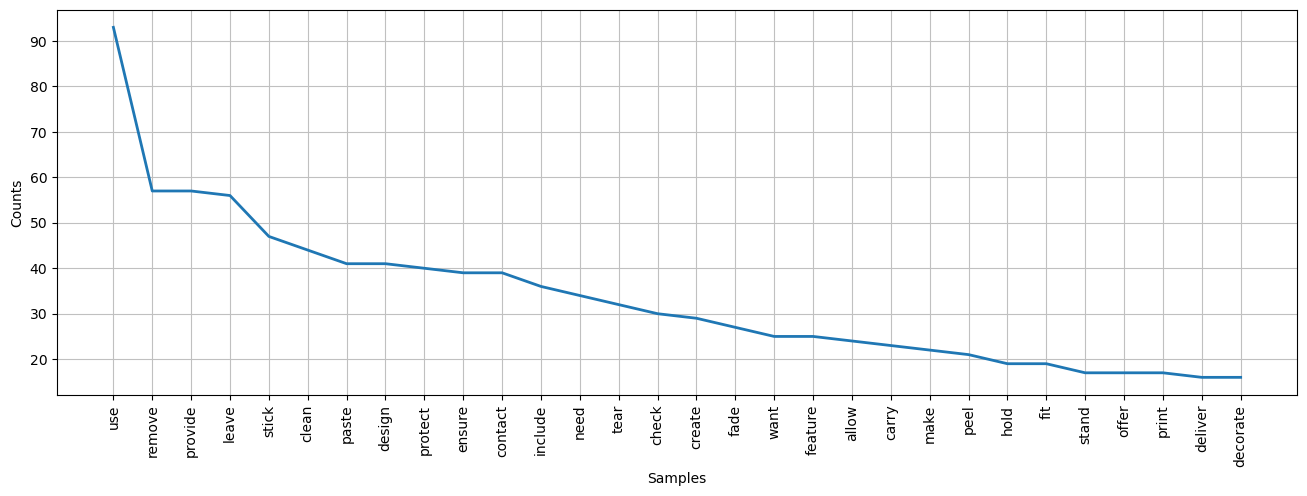

In [61]:
plt.figure(figsize=(16,5))

freq.plot(30, cumulative=False);

Os top 500 livros mais vendidos em janeiro de 2024 na Amazon possuem os seguintes top 5 tokens (unigramas) para descrição:

        - use
        - remove
        - provide
        - leave
        - stick

# Unigrama, bigrama, trigrama e ngrama

Nem sempre o mais interessante é trabalhar com cada token isolado. Há situações em que o melhor vai ser trabalhar com grupos de tokens.

## Bigramas

Como já analisamos unigramas na seção anterior, vamos começar por bigramas.

In [62]:
# Aplana a lista de listas
flat_tokens = list(chain.from_iterable(data["tokens"].values))

# bigramas
bigr = bigrams(flat_tokens)

# Calcula a frequência
freq = FreqDist(bigr)

In [63]:
print(freq.most_common())

[(('use', 'clean'), 27), (('use', 'create'), 22), (('remove', 'leave'), 18), (('tear', 'paste'), 16), (('peel', 'stick'), 13), (('paste', 'tear'), 13), (('clean', 'stick'), 12), (('need', 'use'), 11), (('leave', 'peel'), 11), (('feel', 'contact'), 11), (('leave', 'paste'), 10), (('stick', 'like'), 9), (('clean', 'remove'), 8), (('stick', 'leave'), 8), (('clean', 'use'), 6), (('leave', 'leave'), 6), (('leave', 'transfer'), 6), (('transfer', 'remove'), 6), (('remove', 'damage'), 6), (('use', 'remove'), 6), (('tear', 'stick'), 6), (('ink', 'sunscreen'), 6), (('sunscreen', 'fade'), 6), (('fade', 'personalize'), 6), (('personalize', 'use'), 6), (('remove', 'press'), 6), (('press', 'ensure'), 6), (('ensure', 'recommend'), 6), (('contact', 'provide'), 6), (('apply', 'remove'), 6), (('reuse', 'remove'), 5), (('leave', 'show'), 5), (('fade', 'need'), 5), (('clean', 'want'), 5), (('paste', 'leave'), 5), (('match', 'purchase'), 5), (('provide', 'provide'), 5), (('provide', 'protect'), 5), (('purc

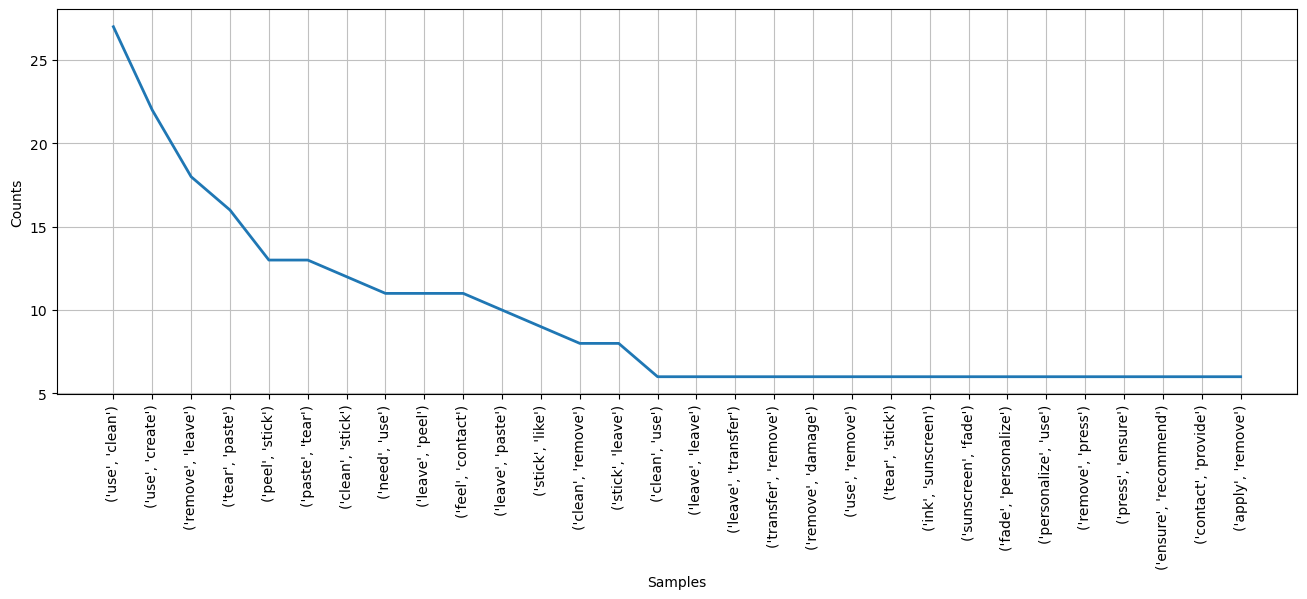

In [64]:
plt.figure(figsize=(16,5))

freq.plot(30, cumulative=False);

Os top 500 livros mais vendidos em janeiro de 2024 na Amazon possuem os seguintes top 3 bigramas para descrição:

        - use; clean
        - use; create
        - remove; leave

# Trigrama

In [65]:
# Aplana a lista de listas
flat_tokens = list(chain.from_iterable(data["tokens"].values))

# bigramas
trigr = trigrams(flat_tokens)

# Calcula a frequência
freq = FreqDist(trigr)

In [66]:
print(freq.most_common())

[(('paste', 'tear', 'paste'), 13), (('use', 'clean', 'stick'), 12), (('leave', 'peel', 'stick'), 10), (('leave', 'paste', 'tear'), 10), (('clean', 'stick', 'like'), 9), (('remove', 'leave', 'peel'), 9), (('need', 'use', 'create'), 7), (('use', 'clean', 'remove'), 7), (('clean', 'use', 'create'), 6), (('leave', 'leave', 'transfer'), 6), (('leave', 'transfer', 'remove'), 6), (('transfer', 'remove', 'damage'), 6), (('ink', 'sunscreen', 'fade'), 6), (('sunscreen', 'fade', 'personalize'), 6), (('fade', 'personalize', 'use'), 6), (('personalize', 'use', 'clean'), 6), (('clean', 'remove', 'press'), 6), (('remove', 'press', 'ensure'), 6), (('press', 'ensure', 'recommend'), 6), (('stick', 'leave', 'paste'), 6), (('reuse', 'remove', 'leave'), 5), (('remove', 'leave', 'show'), 5), (('fade', 'need', 'use'), 5), (('tear', 'stick', 'leave'), 5), (('leave', 'show', 'diy'), 4), (('show', 'diy', 'use'), 4), (('diy', 'use', 'clean'), 4), (('stick', 'like', 'want'), 4), (('like', 'want', 'come'), 4), (('

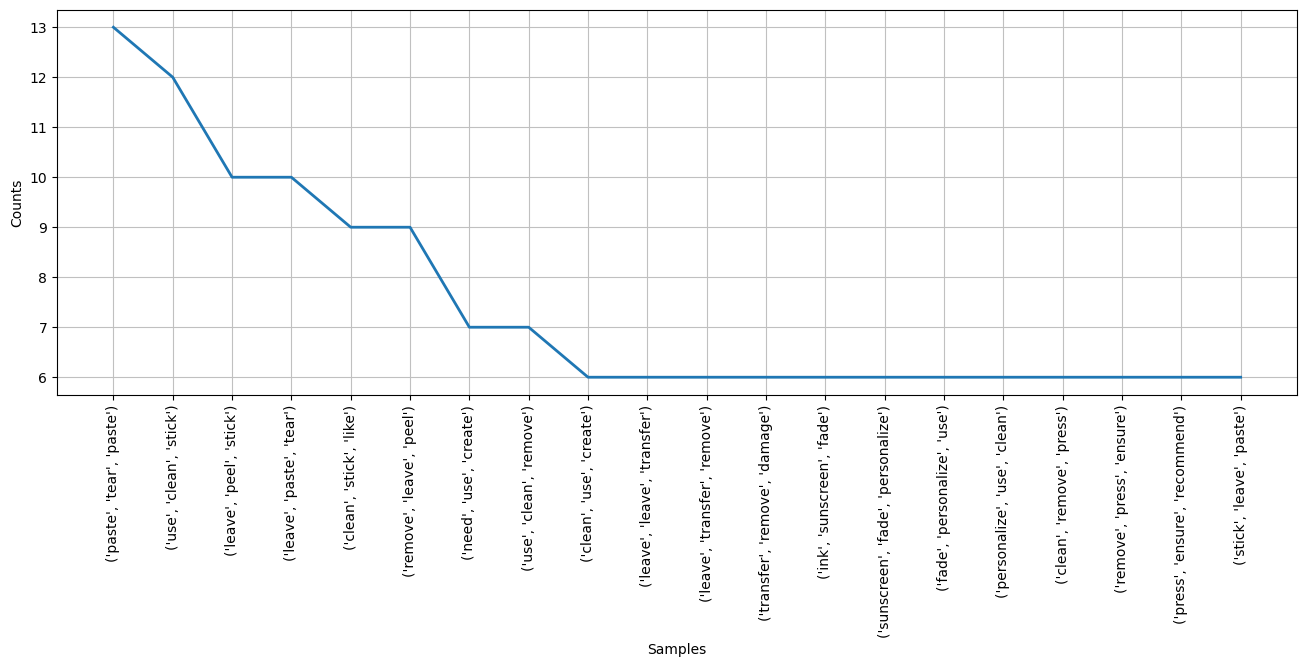

In [67]:
plt.figure(figsize=(16,5))

freq.plot(20, cumulative=False);

Os top 500 livros mais vendidos em janeiro de 2024 na Amazon possuem os seguintes top 3 trigramas para descrição:

        - paste; tear; paste
        - use; clean; stick
        - leave; peel; stick

# Ngramas

Agora vamos fazer um ngrama de 4 tokens. 

In [68]:
# Aplana a lista de listas
flat_tokens = list(chain.from_iterable(data["tokens"].values))

# bigramas
ngr = ngrams(flat_tokens, 4)

# Calcula a frequência
freq = FreqDist(ngr)

In [69]:
print(freq.most_common())

[(('leave', 'paste', 'tear', 'paste'), 10), (('use', 'clean', 'stick', 'like'), 9), (('remove', 'leave', 'peel', 'stick'), 9), (('leave', 'leave', 'transfer', 'remove'), 6), (('leave', 'transfer', 'remove', 'damage'), 6), (('ink', 'sunscreen', 'fade', 'personalize'), 6), (('sunscreen', 'fade', 'personalize', 'use'), 6), (('fade', 'personalize', 'use', 'clean'), 6), (('personalize', 'use', 'clean', 'remove'), 6), (('use', 'clean', 'remove', 'press'), 6), (('clean', 'remove', 'press', 'ensure'), 6), (('remove', 'press', 'ensure', 'recommend'), 6), (('stick', 'leave', 'paste', 'tear'), 6), (('reuse', 'remove', 'leave', 'show'), 5), (('fade', 'need', 'use', 'create'), 5), (('remove', 'leave', 'show', 'diy'), 4), (('leave', 'show', 'diy', 'use'), 4), (('show', 'diy', 'use', 'clean'), 4), (('diy', 'use', 'clean', 'stick'), 4), (('clean', 'stick', 'like', 'want'), 4), (('stick', 'like', 'want', 'come'), 4), (('like', 'want', 'come', 'meet'), 4), (('use', 'clean', 'use', 'create'), 4), (('clea

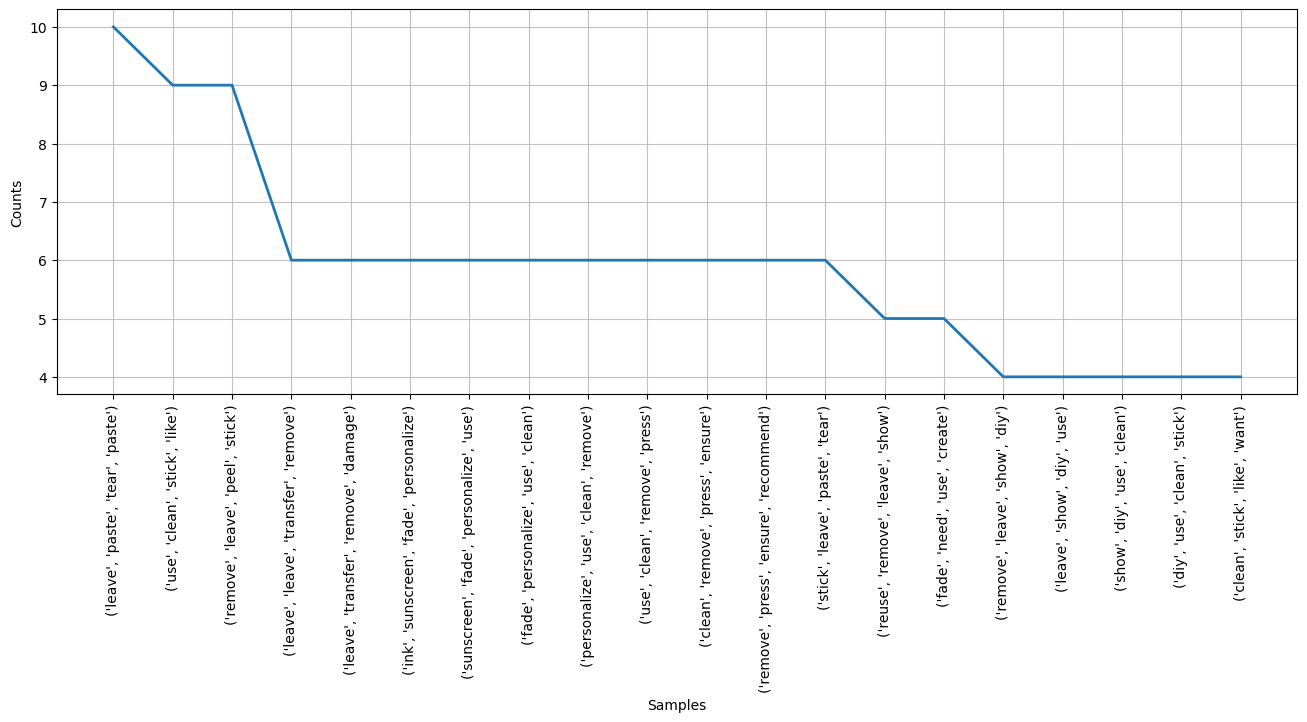

In [70]:
plt.figure(figsize=(16,5))

freq.plot(20, cumulative=False);

Os top 500 livros mais vendidos em janeiro de 2024 na Amazon possuem os seguintes top 3 ngramas de 4 tokens para descrição:

        - leave; paste; tear; paste
        - use; clean; stick; like
        - remove; leave; peel; stick

# Nuvem de Palavras (Wordcloud)

In [71]:
cloud = WordCloud()

In [72]:
# Convertendo listas de tokens para strings
text = ' '.join([' '.join(tokens) for tokens in data['tokens']])

# Criando a nuvem de palavras
cloud.generate(text)

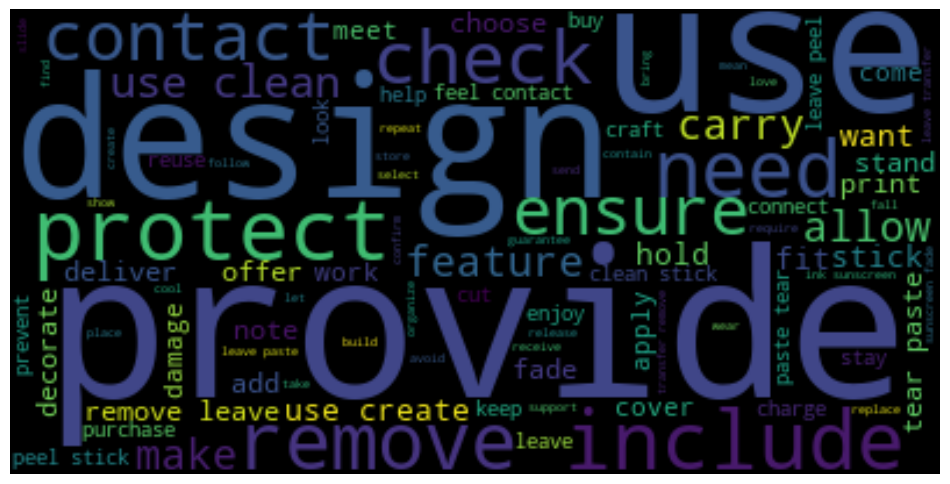

In [73]:
plt.figure(figsize=(12, 12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

As palavras mais frequentes são aquelas com o maior tamanho de fonte na nuvem. São essas as palavras: provide, use, design, protect, need, remove e include.

# Comparando similaridade de textos

Vamos fazer a raspagem de páginas da wikipedia e compará-las. 

## Ciência de Dados wikipedia page

In [74]:
import requests
from bs4 import BeautifulSoup

url = "https://pt.wikipedia.org/wiki/Ci%C3%AAncia_de_dados"

# Fazendo a requisição para a página
response = requests.get(url)

# Verificando se a requisição foi bem-sucedida (código 200)
if response.status_code == 200:
    # Parseando o conteúdo da página com BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Agora você pode procurar por elementos HTML e extrair informações
    # Vamos extrair o título da página como exemplo
    titulo_pagina = soup.title.text
    print(f"Título da página: {titulo_pagina}")

    # Também podemos extrair o texto do conteúdo principal da página
    conteudo_principal = soup.find('div', {'id': 'mw-content-text'})
    texto = conteudo_principal.get_text()
    print(texto)
else:
    print(f"A requisição falhou com o código de status {response.status_code}")


Título da página: Ciência de dados – Wikipédia, a enciclopédia livre
A ciência de dados (em inglês:  data science) é uma área interdisciplinar, que localiza-se em uma interface entre a estatística e a ciência da computação e utiliza o método científico; processos, algoritmos e sistemas, para extrair conhecimento e tomar decisões a partir de dados dos diversos tipos, sendo eles ruidosos, nebulosos, estruturados ou não-estruturados. Sendo assim uma área voltada para o estudo e a análise organizada de dados científicos e mercadológicos, financeiros, sociais, geográficos, históricos, biológicos, psicológicos, dentre muitos outros. Visa, desse modo, a extração de conhecimento, detecção de padrões e/ou obtenção de insights para possíveis tomadas de decisão. Ciência de dados enquanto campo existe há 30 anos, porém ganhou mais destaque nos últimos anos devido a alguns fatores como o surgimento e popularização de grandes bancos de dados e o desenvolvimento de áreas como machine learning. Cienti

In [75]:
import spacy

# Carregar o modelo de linguagem em português do spaCy
nlp = spacy.load('pt_core_news_sm')

# Aplicar o modelo ao texto
doc = nlp(texto)

# Inicializar a lista de tokens
tokens = []

# Iterar sobre os tokens no documento
for token in doc:
    # Verificar se o token é um verbo, é alfabético e não é uma stop word
    if token.pos_ == "VERB" and token.is_alpha and not token.is_stop:
        tokens.append(str.lower(token.lemma_))
    elif not token.pos_ == "VERB" and token.is_alpha and not token.is_stop:
        tokens.append(str.lower(token.text))

# Exibir os tokens resultantes
print(tokens)


['ciência', 'dados', 'inglês', 'data', 'science', 'interdisciplinar', 'interface', 'estatística', 'ciência', 'computação', 'utilizar', 'método', 'científico', 'processos', 'algoritmo', 'sistemas', 'extrair', 'conhecimento', 'tomar', 'decisões', 'dados', 'diversos', 'tipos', 'sendo', 'ruidosos', 'nebulosos', 'estruturar', 'sendo', 'voltar', 'estudo', 'análise', 'organizar', 'dados', 'científicos', 'mercadológicos', 'financeiros', 'sociais', 'geográficos', 'históricos', 'biológicos', 'psicológicos', 'dentre', 'visa', 'modo', 'extração', 'conhecimento', 'detecção', 'padrões', 'obtenção', 'insights', 'possíveis', 'tomadas', 'decisão', 'ciência', 'dados', 'campo', 'existir', 'haver', 'anos', 'ganhar', 'destaque', 'últimos', 'anos', 'devido', 'fatores', 'surgimento', 'popularização', 'bancos', 'dados', 'desenvolvimento', 'áreas', 'machine', 'learning', 'cientistas', 'dados', 'trabalhar', 'setor', 'privado', 'transformar', 'quantidades', 'dados', 'brutos', 'insights', 'negócios', 'auxiliar', 

## Processamento Linguagem Natural (PLN) wikipedia page

In [76]:
url = "https://pt.wikipedia.org/wiki/Processamento_de_linguagem_natural#:~:text=Processamento%20de%20l%C3%ADngua%20natural%20(PLN,autom%C3%A1tica%20de%20l%C3%ADnguas%20humanas%20naturais."

# Fazendo a requisição para a página
response = requests.get(url)

# Verificando se a requisição foi bem-sucedida (código 200)
if response.status_code == 200:
    # Parseando o conteúdo da página com BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Agora você pode procurar por elementos HTML e extrair informações
    # Vamos extrair o título da página como exemplo
    titulo_pagina = soup.title.text
    print(f"Título da página: {titulo_pagina}")

    # Também podemos extrair o texto do conteúdo principal da página
    conteudo_principal = soup.find('div', {'id': 'mw-content-text'})
    texto = conteudo_principal.get_text()
    print(texto)
else:
    print(f"A requisição falhou com o código de status {response.status_code}")


Título da página: Processamento de linguagem natural – Wikipédia, a enciclopédia livre
As referências deste artigo necessitam de formatação. Por favor, utilize fontes apropriadas contendo título, autor e data para que o verbete permaneça verificável. (Maio de 2022)
Este artigo carece de reciclagem de acordo com o  livro de estilo. Sinta-se livre para editá-lo(a) para que este(a) possa atingir um nível de qualidade superior. (Dezembro de 2016)Esta página cita fontes, mas que não cobrem todo o conteúdo. Ajude a inserir referências. Conteúdo não verificável pode ser removido.—Encontre fontes: ABW  •  CAPES  •   Google (N • L • A) (Dezembro de 2016)
Um assistente virtual automático que faz atendimento ao consumidor na internet, um exemplo onde há aplicação do processamento de língua natural.[1]
Processamento de língua natural (PLN) é uma subárea da ciência da computação, inteligência artificial e da linguística que estuda os problemas da geração e compreensão automática de línguas humanas 

In [77]:
import spacy

# Carregar o modelo de linguagem em português do spaCy
nlp = spacy.load('pt_core_news_sm')

# Aplicar o modelo ao texto
doc = nlp(texto)

# Inicializar a lista de tokens
tokens_sec = []

# Iterar sobre os tokens no documento
for token in doc:
    # Verificar se o token é um verbo, é alfabético e não é uma stop word
    if token.pos_ == "VERB" and token.is_alpha and not token.is_stop:
        tokens_sec.append(str.lower(token.lemma_))
    elif not token.pos_ == "VERB" and token.is_alpha and not token.is_stop:
        tokens_sec.append(str.lower(token.text))

# Exibir os tokens resultantes
print(tokens_sec)


['referências', 'artigo', 'necessitar', 'formatação', 'utilizar', 'fontes', 'apropriar', 'conter', 'título', 'autor', 'data', 'verbete', 'permaneça', 'verificável', 'maio', 'artigo', 'carecer', 'reciclagem', 'acordo', 'livro', 'estilo', 'livre', 'poder', 'atingir', 'qualidade', 'superior', 'dezembro', 'página', 'citar', 'fontes', 'cobrir', 'conteúdo', 'ajude', 'inserir', 'referências', 'conteúdo', 'verificável', 'fontes', 'abw', 'capes', 'google', 'n', 'l', 'dezembro', 'assistente', 'virtual', 'automático', 'atendimento', 'consumidor', 'internet', 'haver', 'aplicação', 'processamento', 'língua', 'processamento', 'língua', 'natural', 'pln', 'subárea', 'ciência', 'computação', 'inteligência', 'artificial', 'linguística', 'estudar', 'problemas', 'geração', 'compreensão', 'automática', 'línguas', 'humanas', 'naturais', 'sistemas', 'geração', 'língua', 'natural', 'converter', 'informação', 'bancos', 'dados', 'computadores', 'linguagem', 'compreensível', 'humano', 'sistemas', 'compreensão', 

## Similaridade

Vamos comparar os textos da wikipedia sobre ciência de dados e processamento de linguagem natural. 

In [78]:
#!python -m spacy download pt_core_news_md

In [79]:
nlp = spacy.load("pt_core_news_md")

In [80]:
# Convertendo listas de tokens para strings
page_one = nlp(' '.join(tokens))
page_two = nlp(' '.join(tokens_sec)) 

In [81]:
similar = page_one.similarity(page_two)
print(f"A similaridade dos textos é de: {round(similar*100, 2)}%.")

A similaridade dos textos é de: 94.23%.


# Modelagem de Tópicos

"Um método para achar e traçar clusters de palavras (chamado 'tópicos' de forma abreviada) em grandes corpos de texto." (Miriam Posner 2012)

        - Tópico 1: [peixe, pescaria, vara]
        - Tópico 2: [navio, mar, barco]

In [82]:
import requests
from bs4 import BeautifulSoup

url = "https://pt.wikipedia.org/wiki/Ci%C3%AAncia_de_dados"

# Fazendo a requisição para a página
response = requests.get(url)

# Verificando se a requisição foi bem-sucedida (código 200)
if response.status_code == 200:
    # Parseando o conteúdo da página com BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Agora você pode procurar por elementos HTML e extrair informações
    # Vamos extrair o título da página como exemplo
    titulo_pagina = soup.title.text
    print(f"Título da página: {titulo_pagina}")

    # Também podemos extrair o texto do conteúdo principal da página
    conteudo_principal = soup.find('div', {'id': 'mw-content-text'})
    texto = conteudo_principal.get_text()
    print(texto)
else:
    print(f"A requisição falhou com o código de status {response.status_code}")


Título da página: Ciência de dados – Wikipédia, a enciclopédia livre
A ciência de dados (em inglês:  data science) é uma área interdisciplinar, que localiza-se em uma interface entre a estatística e a ciência da computação e utiliza o método científico; processos, algoritmos e sistemas, para extrair conhecimento e tomar decisões a partir de dados dos diversos tipos, sendo eles ruidosos, nebulosos, estruturados ou não-estruturados. Sendo assim uma área voltada para o estudo e a análise organizada de dados científicos e mercadológicos, financeiros, sociais, geográficos, históricos, biológicos, psicológicos, dentre muitos outros. Visa, desse modo, a extração de conhecimento, detecção de padrões e/ou obtenção de insights para possíveis tomadas de decisão. Ciência de dados enquanto campo existe há 30 anos, porém ganhou mais destaque nos últimos anos devido a alguns fatores como o surgimento e popularização de grandes bancos de dados e o desenvolvimento de áreas como machine learning. Cienti

In [83]:
# definindo modelo de linguagem em português nível médio
nlp = spacy.load("pt_core_news_sm")

# Carregar o modelo de linguagem em português do spaCy
nlp = spacy.load('pt_core_news_sm')

# Aplicar o modelo ao texto
doc = nlp(texto)

# Inicializar a lista de tokens
tokens = []

# Iterar sobre os tokens no documento
for token in doc:
    # Verificar se o token é um verbo, é alfabético e não é uma stop word
    if token.pos_ == "VERB" and token.is_alpha and not token.is_stop:
        tokens.append(str.lower(token.lemma_))
    elif not token.pos_ == "VERB" and token.is_alpha and not token.is_stop:
        tokens.append(str.lower(token.text))

# Exibir os tokens resultantes
print(tokens)


['ciência', 'dados', 'inglês', 'data', 'science', 'interdisciplinar', 'interface', 'estatística', 'ciência', 'computação', 'utilizar', 'método', 'científico', 'processos', 'algoritmo', 'sistemas', 'extrair', 'conhecimento', 'tomar', 'decisões', 'dados', 'diversos', 'tipos', 'sendo', 'ruidosos', 'nebulosos', 'estruturar', 'sendo', 'voltar', 'estudo', 'análise', 'organizar', 'dados', 'científicos', 'mercadológicos', 'financeiros', 'sociais', 'geográficos', 'históricos', 'biológicos', 'psicológicos', 'dentre', 'visa', 'modo', 'extração', 'conhecimento', 'detecção', 'padrões', 'obtenção', 'insights', 'possíveis', 'tomadas', 'decisão', 'ciência', 'dados', 'campo', 'existir', 'haver', 'anos', 'ganhar', 'destaque', 'últimos', 'anos', 'devido', 'fatores', 'surgimento', 'popularização', 'bancos', 'dados', 'desenvolvimento', 'áreas', 'machine', 'learning', 'cientistas', 'dados', 'trabalhar', 'setor', 'privado', 'transformar', 'quantidades', 'dados', 'brutos', 'insights', 'negócios', 'auxiliar', 

In [84]:
# Instale o memory-profiler usando pip
#!pip install memory-profiler


In [85]:
len(tokens)

1119

## Modelo BERTopic

- Transformer model.

- Embedding: a way of taking a document which is a string and transform it into a numerical representation. The numerical represenation may improve the clusters. 

In [97]:
topic_model = BERTopic(language="portuguese", embedding_model="all-MiniLM-L6-v2")

In [1]:
#topics, probs = topic_model.fit_transform(tokens)

In [86]:
# from memory_profiler import profile

# #subset_tokens = tokens[:50]  # Ajuste para o tamanho desejado

# @profile
# def train_model():
#     topic_model = BERTopic(language="portuguese", 
#                            embedding_model="all-MiniLM-L6-v2",
#                            nr_topics=3, 
#                            top_n_words=2)
#     topic_model.fit_transform(tokens)

# train_model()

**ATENÇÃO:** Este modelo consome uma capacidade computaional muito alta. Por isso, executamos em um notebook separado na IDE Google Colab. O Colab permite a utilização do GPU do Google ao selecionar: 

        ambiente de execução > alterar ambiente de execução > selecionar o acelerador de hardware

## Modelo KMeans 

### Número ótimo de clusters

Clusterização de tópicos pelo modelo KMeans. Aqui vamos obter o número ótimo de clusters que minimiza a inércia e maximiza o coeficiente de silhueta. Abaixo os parâmetros do modelo Word2Vec.

**tokens:** Uma lista de listas, onde cada lista interna contém tokens representando uma frase ou documento.

**vector_size:** O tamanho dos vetores de palavra (ou embedding). Este é o número de dimensões dos vetores de palavra. Vetores de dimensões mais altas podem capturar relacionamentos semânticos mais complexos, mas também exigem mais recursos computacionais. Geralmente, valores entre 100 e 300 são comuns.

**window:** A distância máxima entre a palavra atual e as palavras previstas na vizinhança. Se definido como 5, a palavra atual será predita com base nas 5 palavras à sua frente e nas 5 palavras atrás dela.

**min_count:** Ignora todas as palavras com contagem total inferior a este valor. Isso ajuda a reduzir o vocabulário e, consequentemente, o tamanho do modelo.

**workers:** O número de threads paralelas para treinar o modelo. Isso acelera o treinamento, especialmente para grandes conjuntos de dados.

In [88]:
from gensim.models import Word2Vec
from sklearn.preprocessing import normalize

In [89]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np

# Treine o modelo Word2Vec
word2vec_model = Word2Vec(tokens, vector_size=100, window=5, min_count=1, workers=4)

# Obtém vetores de palavras
word_vectors = word2vec_model.wv
vectors = [word_vectors.get_vector(word) for word in word_vectors.key_to_index]

# Normaliza os vetores
normalized_vectors = normalize(vectors)

# Testa diferentes números de clusters
for n_clusters in range(2, 11):
    # Modelagem de tópicos com K-Means
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_output = kmeans_model.fit_predict(normalized_vectors)
    
    # Avalia a inércia
    inertia = kmeans_model.inertia_
    
    # Avalia o silhouette score
    silhouette_avg = silhouette_score(normalized_vectors, kmeans_output)
    
    print(f"Número de Clusters: {n_clusters}, Inércia: {inertia}, Silhouette Score: {silhouette_avg}")


Número de Clusters: 2, Inércia: 0.17703918461390572, Silhouette Score: 0.8082097756593704
Número de Clusters: 3, Inércia: 0.1471880120013981, Silhouette Score: 0.4876717514991707
Número de Clusters: 4, Inércia: 0.13360682303315524, Silhouette Score: 0.3155708606127505
Número de Clusters: 5, Inércia: 0.12126644380841424, Silhouette Score: 0.2925681394617168
Número de Clusters: 6, Inércia: 0.11569428244186834, Silhouette Score: 0.10386837028363746
Número de Clusters: 7, Inércia: 0.10637864878250912, Silhouette Score: 0.016082781761712676
Número de Clusters: 8, Inércia: 0.0972336936081138, Silhouette Score: 0.10814542127905573
Número de Clusters: 9, Inércia: 0.08876038302070577, Silhouette Score: 0.009772930477650595
Número de Clusters: 10, Inércia: 0.0807176456933568, Silhouette Score: 0.12409431960681891


### Ajuste do modelo KMeans

In [90]:
# Treine o modelo Word2Vec
word2vec_model = Word2Vec(tokens, vector_size=100, window=5, min_count=1, workers=4)

# Obtém vetores de palavras
word_vectors = word2vec_model.wv
vectors = [word_vectors.get_vector(word) for word in word_vectors.key_to_index]

# Normaliza os vetores
normalized_vectors = normalize(vectors)

# Modelagem de tópicos com K-Means
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_output = kmeans_model.fit_predict(normalized_vectors)


In [91]:
kmeans_model

KMeans(n_clusters=2, random_state=42)

Inércia (Within-Cluster Sum of Squares): A inércia mede a soma das distâncias quadráticas de cada ponto para o centro do cluster ao qual está atribuído. Quanto menor a inércia, melhor.

In [92]:
inertia = kmeans_model.inertia_
print(f"Inércia: {inertia}")


Inércia: 0.17703918461390572


Silhouette Score: O coeficiente de silhueta mede o quão bem os clusters estão separados. Ele varia de -1 a 1, onde um valor mais alto indica uma clusterização melhor.

In [93]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(normalized_vectors, kmeans_output)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.8082097756593704


### Previsão do modelo

In [94]:
kmeans_output

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

In [95]:
# Obtém as previsões para cada vetor
predictions = kmeans_model.predict(normalized_vectors)

# Conta quantos documentos estão em cada cluster
from collections import Counter
cluster_counts = Counter(predictions)

# Exibe a distribuição dos documentos em cada cluster
print("Distribuição dos documentos em cada cluster:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} documentos")


Distribuição dos documentos em cada cluster:
Cluster 0: 35 documentos
Cluster 1: 1 documentos


A distribuição dos documentos em cada cluster indica quantos documentos foram atribuídos a cada grupo após a execução do algoritmo KMeans. Neste caso específico:

Esses números indicam que o KMeans agrupou os documentos em três clusters distintos, e a maioria (35 documentos) foi atribuída ao Cluster 0, enquanto apenas 1 documento foi atribuído tanto ao Cluster 1.

Esses números podem fornecer uma visão inicial da distribuição dos documentos, mas para interpretar o significado específico de cada cluster, você pode querer examinar os documentos dentro de cada cluster. Dependendo do contexto do seu conjunto de dados, esses clusters podem representar diferentes tópicos, categorias ou grupos de documentos semelhantes. Analisar os documentos em cada cluster pode ajudar a atribuir significado aos grupos identificados pelo algoritmo KMeans.

In [96]:
# Mapeia cada vetor para o cluster correspondente
cluster_assignments = list(zip(predictions, range(len(predictions))))

# Cria um dicionário onde a chave é o número do cluster e o valor é uma lista de documentos associados a esse cluster
cluster_documents = {}
for cluster, document in cluster_assignments:
    if cluster not in cluster_documents:
        cluster_documents[cluster] = []
    cluster_documents[cluster].append(document)

# Exibe o conteúdo de cada cluster
print("Conteúdo de cada cluster:")
for cluster, documents in cluster_documents.items():
    print(f"Cluster {cluster}:")
    for doc_index in documents:
        print(f"  Documento {doc_index}: {tokens[doc_index]}")
    print("\n")


Conteúdo de cada cluster:
Cluster 0:
  Documento 0: ciência
  Documento 1: dados
  Documento 2: inglês
  Documento 3: data
  Documento 4: science
  Documento 5: interdisciplinar
  Documento 6: interface
  Documento 7: estatística
  Documento 8: ciência
  Documento 9: computação
  Documento 10: utilizar
  Documento 11: método
  Documento 12: científico
  Documento 13: processos
  Documento 14: algoritmo
  Documento 15: sistemas
  Documento 16: extrair
  Documento 17: conhecimento
  Documento 18: tomar
  Documento 19: decisões
  Documento 20: dados
  Documento 21: diversos
  Documento 22: tipos
  Documento 23: sendo
  Documento 24: ruidosos
  Documento 25: nebulosos
  Documento 26: estruturar
  Documento 27: sendo
  Documento 28: voltar
  Documento 29: estudo
  Documento 30: análise
  Documento 31: organizar
  Documento 32: dados
  Documento 33: científicos
  Documento 34: mercadológicos


Cluster 1:
  Documento 35: financeiros




# HTML

In [3]:
# HTML com as células do código
!jupyter nbconvert --to html nlp_introduction.ipynb

[NbConvertApp] Converting notebook nlp_introduction.ipynb to html
[NbConvertApp] Writing 2228921 bytes to nlp_introduction.html
